In [1]:
import sys
sys.path.append('..')

In [2]:
from config_simulation import (
    algorithms,
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
)

SGD = algorithms.SGD
WASGD = algorithms.WASGD
SNARiccati = algorithms.SNARiccati
WASNARiccati = algorithms.WASNARiccati
USNA = algorithms.USNA
UWASNA = algorithms.UWASNA
SNA = algorithms.SNA
WASNA = algorithms.WASNA


N = 20
n = 10_000

optimizer_list_without_riccati = [
    WASGD(tau=0.0),  # ASGD
    WASGD(),
    SNA(),
    WASNA(),
    USNA(c_nu=5.0),
    USNA(c_nu=5.0, generate_Z="normal"),
    UWASNA(c_nu = 5.0),
    UWASNA(c_nu = 5.0, generate_Z="normal"),
]

In [3]:
N = 10

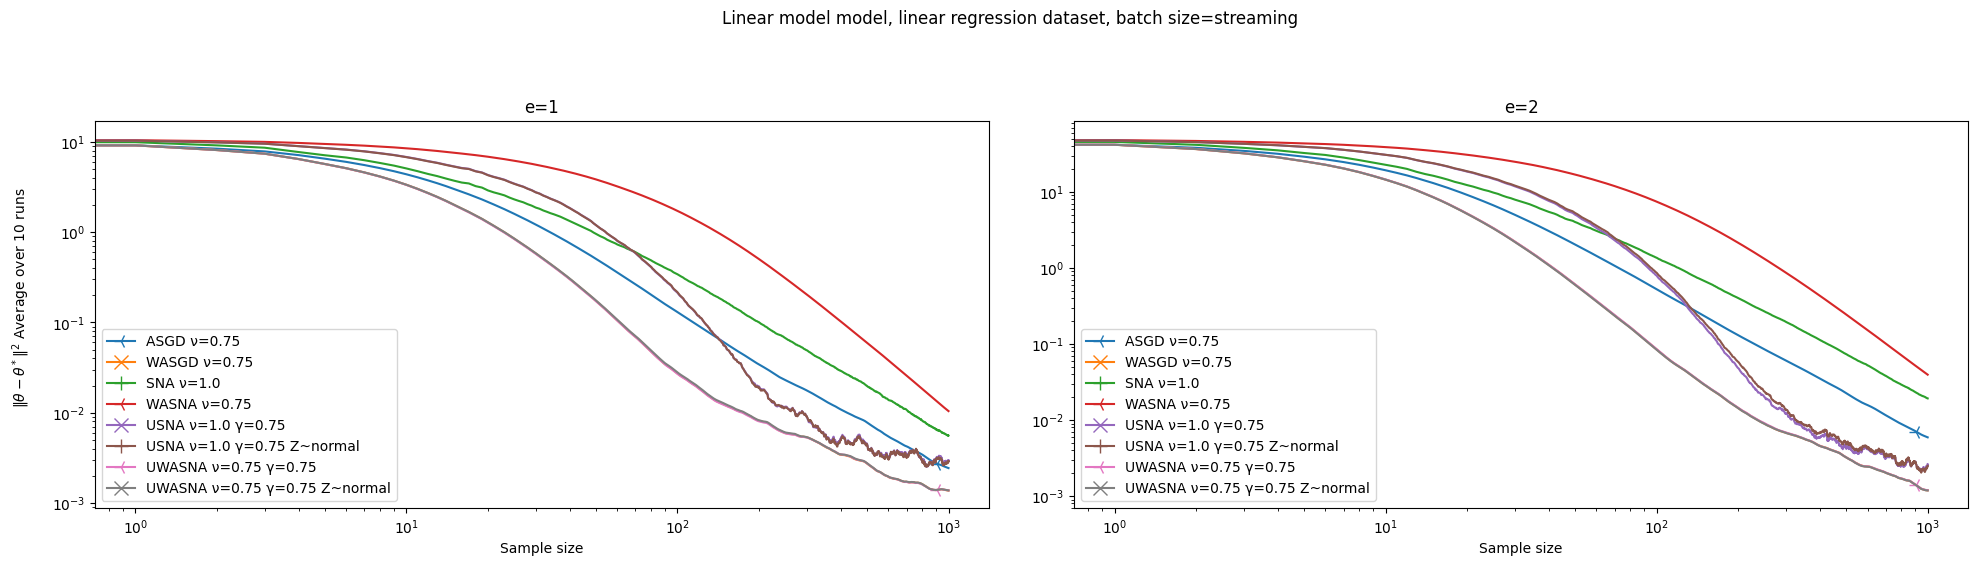

In [4]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_datasets(N=N, n=n)

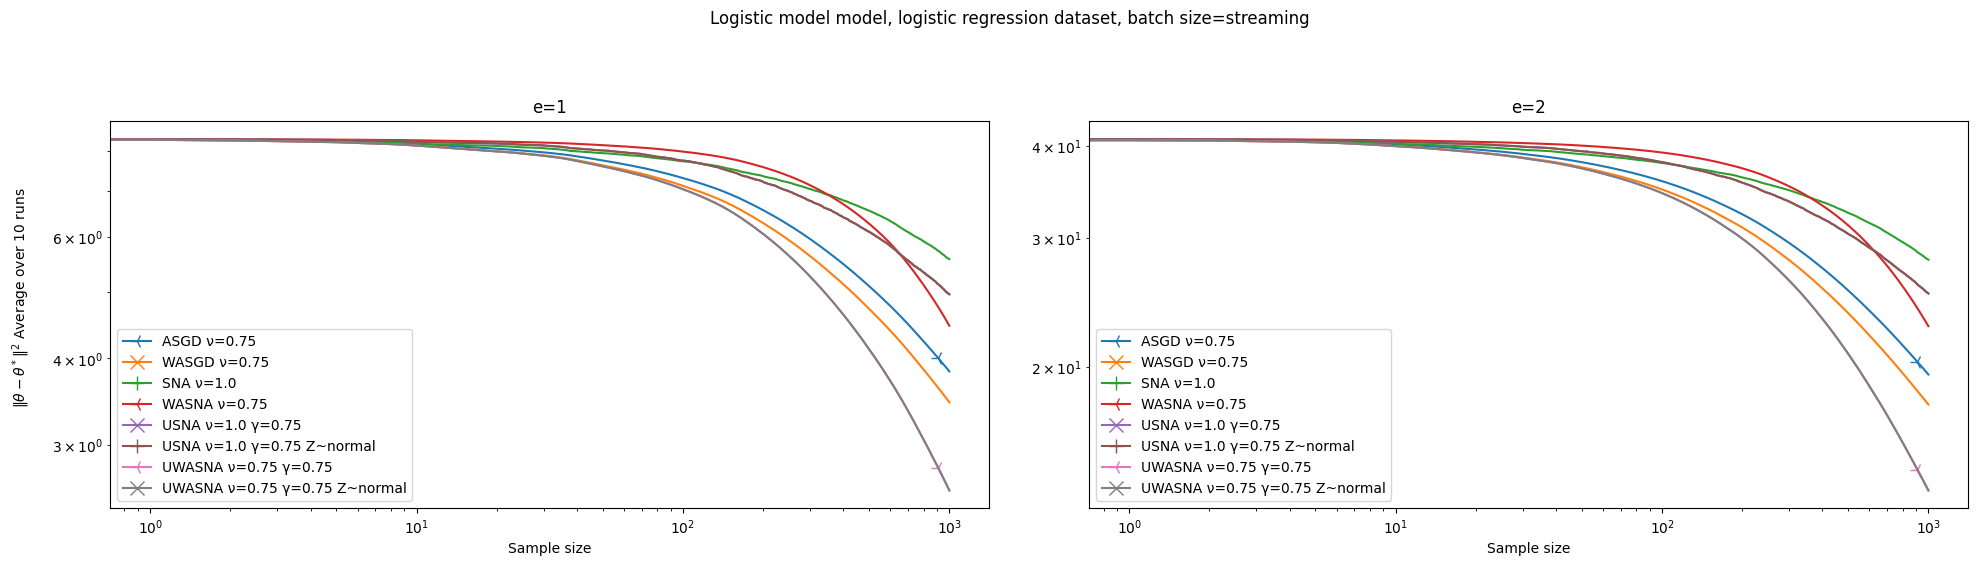

In [5]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_datasets(N=N, n=n)

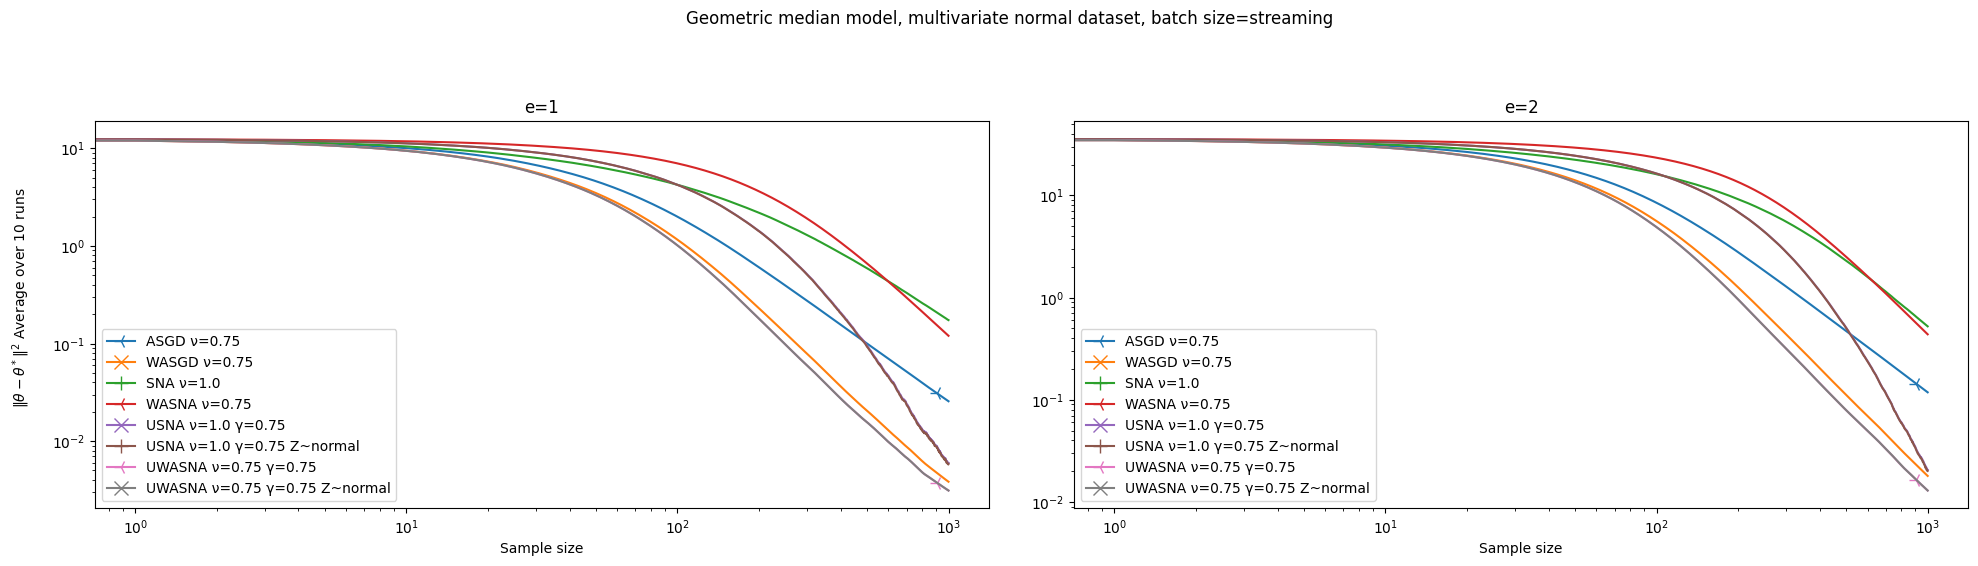

In [6]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_datasets(N=N, n=n)

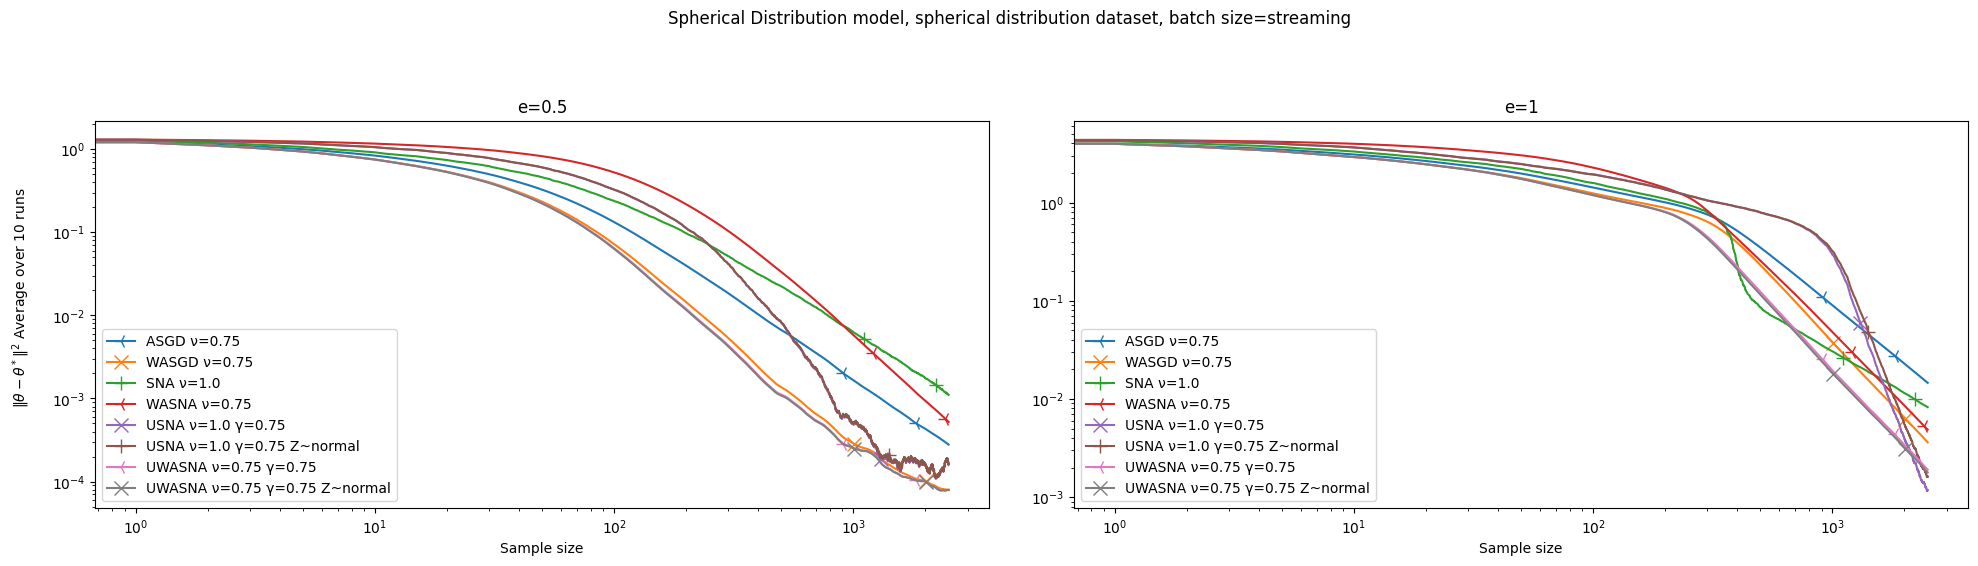

In [7]:
simulation = simulation_spherical_distribution(
    optimizer_list=optimizer_list_without_riccati
)
simulation.run_multiple_datasets(N=N, n=n)

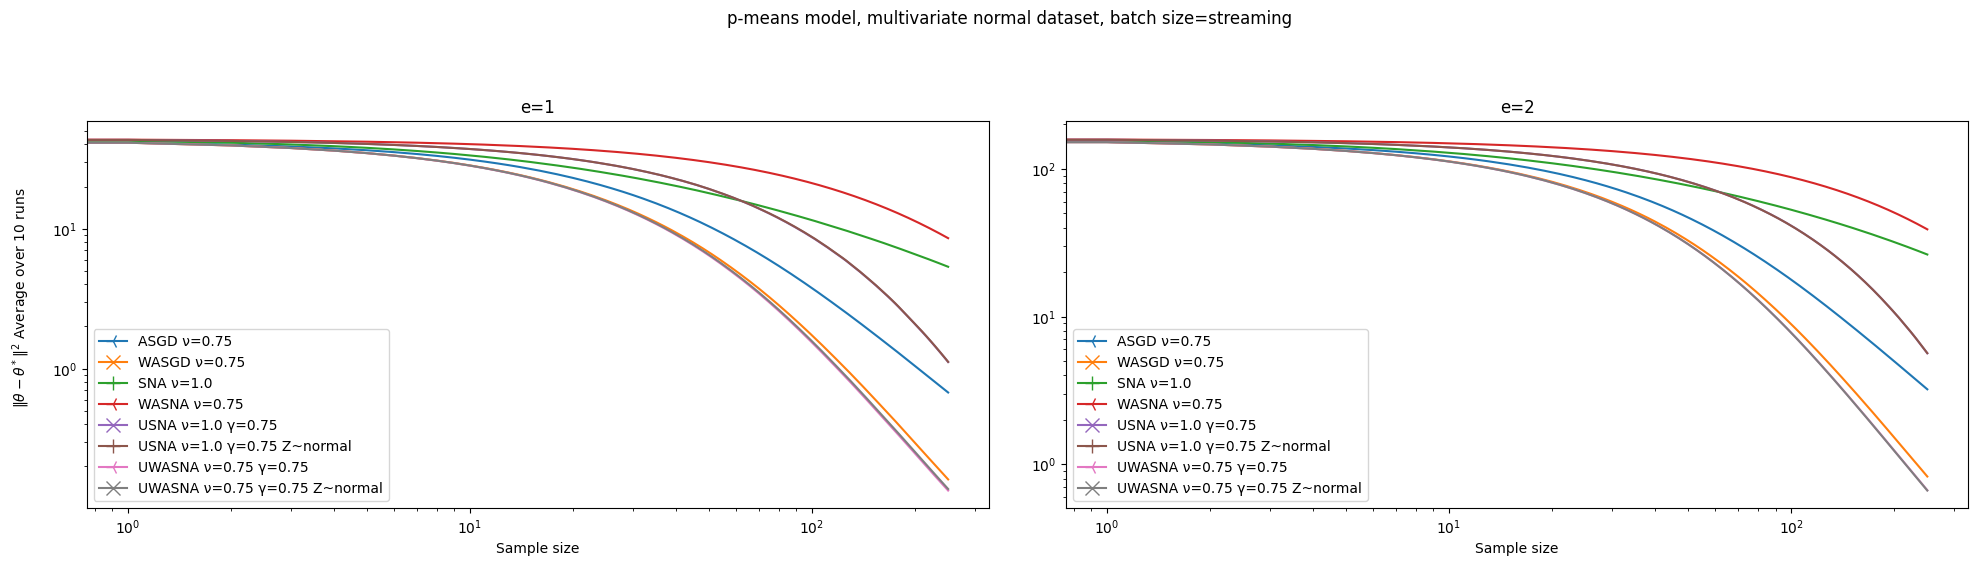

In [8]:
simulation = simulation_p_means(optimizer_list=optimizer_list_without_riccati)
simulation.run_multiple_datasets(N=N, n=n)

In [9]:
eval = eval_covtype(optimizer_list=optimizer_list_without_riccati)
_, _ = eval.run()

,ASGD ν=0.75,WASGD ν=0.75,SNA ν=1.0,WASNA ν=0.75,USNA ν=1.0 γ=0.75,USNA ν=1.0 γ=0.75 Z~normal,UWASNA ν=0.75 γ=0.75,UWASNA ν=0.75 γ=0.75 Z~normal
Training Accuracy,64.940000,66.250000,75.840000,76.240000,54.520000,66.000000,65.200000,64.990000
Test Accuracy,64.820000,66.230000,76.060000,76.340000,54.630000,65.970000,65.100000,64.860000
